<h1 align="center" style="color:orange;">Amazon Delivery Data Analysis</h1>

## Objective - 
The objective of this project is to analyze Amazon’s delivery data to evaluate delivery times, detect orders patterns and provide actionable insights to improve logistics efficiency and customer experience.


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('amazon_delivery.csv')
print(df)

            Order_ID  Agent_Age  Agent_Rating  Store_Latitude  \
0      ialx566343618         37           4.9       22.745049   
1      akqg208421122         34           4.5       12.913041   
2      njpu434582536         23           4.4       12.914264   
3      rjto796129700         38           4.7       11.003669   
4      zguw716275638         32           4.6       12.972793   
...              ...        ...           ...             ...   
43734  jlxf819993117         30           4.8       26.902328   
43735  aevx342135787         21           4.6        0.000000   
43736  xnek760674819         30           4.9       13.022394   
43737  cynl434665991         20           4.7       11.001753   
43738  nsyz997960170         23           4.9       23.351058   

       Store_Longitude  Drop_Latitude  Drop_Longitude  Order_Date Order_Time  \
0            75.892471      22.765049       75.912471  2022-03-19   11:30:00   
1            77.683237      13.043041       77.813237  2022

## Basic informatiom of Data

In [ ]:
df.head() ## its shows first five records

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [ ]:
df.tail() # it shows last five records

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
43734,jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home
43735,aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry
43736,xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home
43737,cynl434665991,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen
43738,nsyz997960170,23,4.9,23.351058,85.325731,23.431058,85.405731,2022-03-02,17:10:00,17:15:00,Fog,Medium,scooter,Metropolitian,180,Cosmetics


In [ ]:
df.info() ## its gives count, non null, data type of each features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [ ]:
df.describe() # its gives statistical information of data

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


## Data cleaning 

In [16]:
df.isnull() ## it shows null data

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43734,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
43735,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
43736,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
43737,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


##### here we can observe that there is no null data in dataset 

## Data Analysis And Data Visualization

In [ ]:
df.Category.count() 

np.int64(43739)

Order_Date
2022-02-11     940
2022-02-12     837
2022-02-13     924
2022-02-14     826
2022-02-15     904
2022-02-16     827
2022-02-17     905
2022-02-18     819
2022-03-01    1076
2022-03-02     969
2022-03-03    1119
2022-03-04     944
2022-03-05    1112
2022-03-06     949
2022-03-07    1093
2022-03-08     919
2022-03-09    1117
2022-03-10     947
2022-03-11    1094
2022-03-12     931
2022-03-13    1123
2022-03-14     931
2022-03-15    1141
2022-03-16     955
2022-03-17    1085
2022-03-18     932
2022-03-19    1103
2022-03-20     945
2022-03-21    1107
2022-03-23     922
2022-03-24    1112
2022-03-25     931
2022-03-26    1119
2022-03-27     932
2022-03-28    1092
2022-03-29     938
2022-03-30    1091
2022-03-31     929
2022-04-01    1092
2022-04-02     945
2022-04-03    1133
2022-04-04     905
2022-04-05    1106
2022-04-06     918
dtype: int64


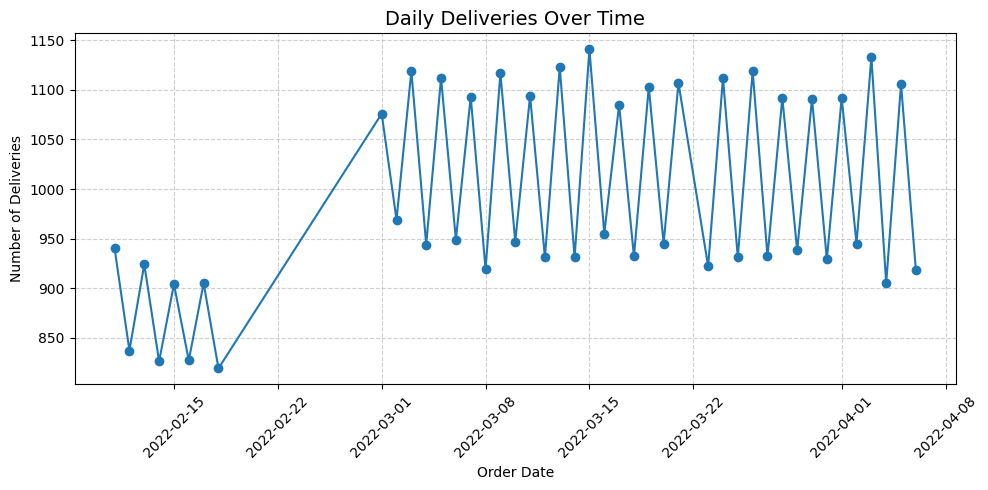

In [ ]:
daily_deliveries = df.groupby('Order_Date').size()
print(daily_deliveries)

plt.figure(figsize=(10,5))
plt.plot(daily_deliveries.index, daily_deliveries.values, marker='o')

plt.title('Daily Deliveries Over Time', fontsize=14)
plt.xlabel('Order Date')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


###  * This chart shows Daily Deliveries over the time

Total Sunday Deliveries: 6006


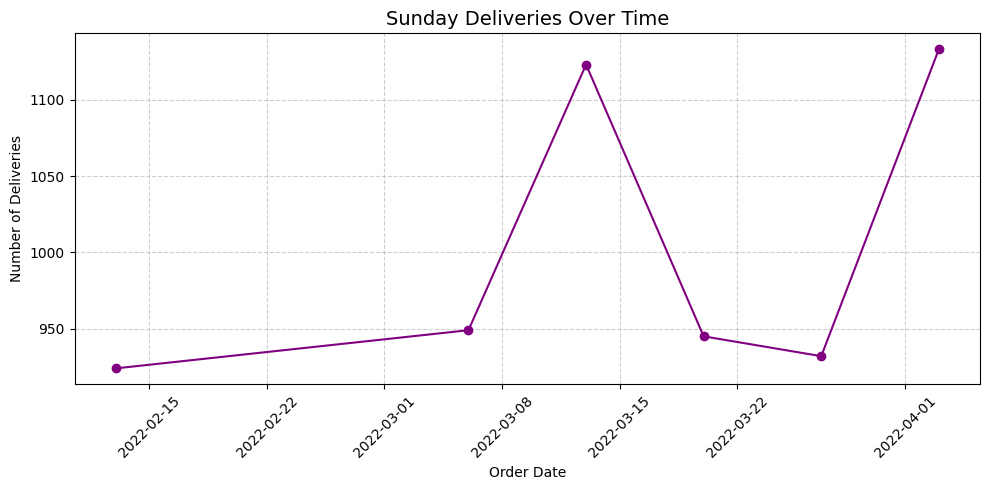

In [13]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['DayOfWeek'] = df['Order_Date'].dt.dayofweek  # 6 = Sunday
sunday_deliveries = df[df['DayOfWeek'] == 6]
sunday_counts = sunday_deliveries['Order_Date'].value_counts().sort_index()

total_sunday_deliveries = sunday_deliveries.shape[0]
print("Total Sunday Deliveries:", total_sunday_deliveries)


plt.figure(figsize=(10,5))
plt.plot(sunday_counts.index, sunday_counts.values, marker='o', color='purple')
plt.title('Sunday Deliveries Over Time', fontsize=14)
plt.xlabel('Order Date')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()






### * This Chart shows deliveries happened on Sundays

In [14]:
df.Category



  

0           Clothing
1        Electronics
2             Sports
3          Cosmetics
4               Toys
            ...     
43734           Home
43735        Jewelry
43736           Home
43737        Kitchen
43738      Cosmetics
Name: Category, Length: 43739, dtype: object

Total Sports Orders: 2719


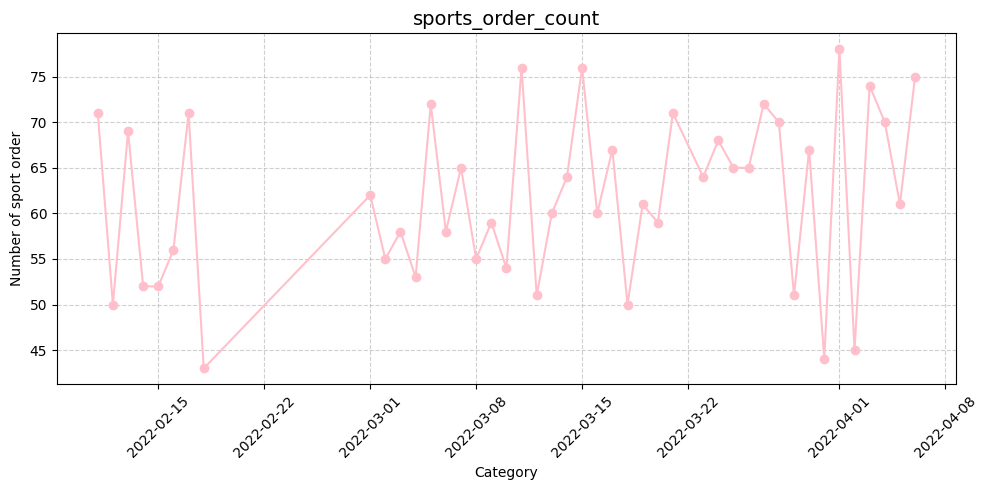

In [15]:
sports_orders = df[df['Category'] == 'Sports']
sports_order_count = sports_orders.shape[0]
print("Total Sports Orders:", sports_order_count)
sports_orders_by_date = sports_orders.groupby('Order_Date').size()


plt.figure(figsize=(10,5))
plt.plot(sports_orders_by_date.index, sports_orders_by_date.values, marker='o', color='pink')
plt.title('sports_order_count', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Number of sport order')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



### * here we can see Sport Categaory order over the time

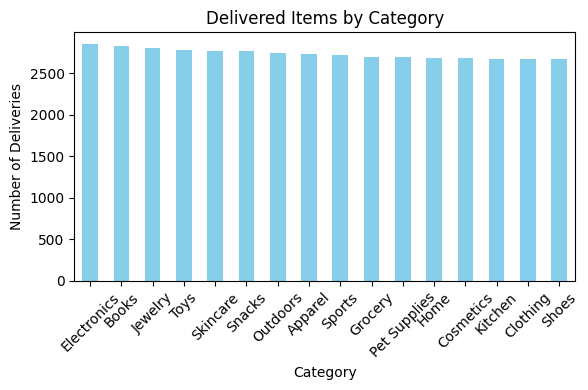

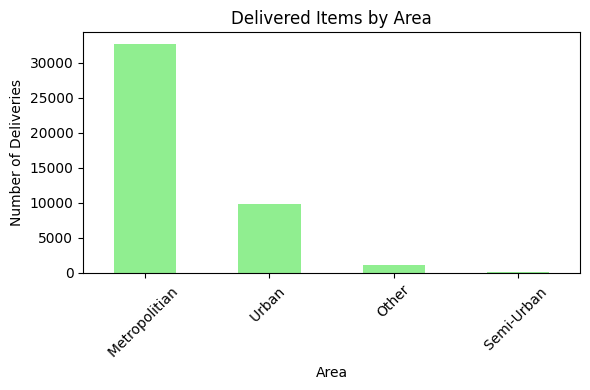

In [16]:


# Category-wise delivery count
category_counts = df['Category'].value_counts()

plt.figure(figsize=(6,4))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Delivered Items by Category')
plt.xlabel('Category')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Area-wise delivery count
area_counts = df['Area'].value_counts()

plt.figure(figsize=(6,4))
area_counts.plot(kind='bar', color='lightgreen')
plt.title('Delivered Items by Area')
plt.xlabel('Area')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### * Category wise and Areawise numbers of orders 

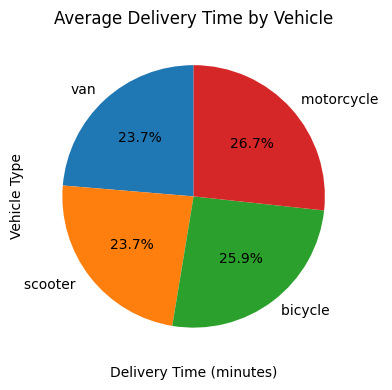

In [17]:



vehicle_times = df.groupby('Vehicle')['Delivery_Time'].mean().sort_values()

plt.figure(figsize=(6,4))
vehicle_times.plot(kind='pie', color='skyblue', startangle = 90, autopct = '%1.1f%%')
plt.title('Average Delivery Time by Vehicle')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Vehicle Type')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### * Based on this chart we can say that highest avarage delivary time is by Motorcycle 
### * Bicycle is second large 
### * After that Van and Scootr comes

## Conclusion:

#### A notable volume of deliveries occurred on Sundays, indicating strong weekend demand or operational capabilities that include weekend logistics. This could inform workforce planning or marketing strategies targeted at weekend shoppers.

#### Certain product categories showed higher delivery frequencies, revealing consumer preferences and helping inventory teams prioritize stocking and logistics for high-demand categories.

#### Tracking daily deliveries over time helped identify trends such as peak delivery days or seasonal patterns. These trends are useful for forecasting demand and managing resources more efficiently.

